In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv', delimiter = ';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
print("Total Columns", df.shape[1])

Total Columns 21


In [11]:
features = df.drop(columns=['y'])
print("Number of features: ", features.shape[1])

Number of features:  20


We only want to keep original 16 features

In [12]:
# define original 16 features from df
original_16_features = [
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
    'poutcome', 'emp.var.rate', 'cons.price.idx'
]

# create new df with only these features and target variable
df_16 = df[original_16_features + ['y']]

In [13]:
df_16.head()


,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,no


In [14]:
# seperate features and target
X_16 = df_16.drop(columns=['y'])
y_16 = df_16['y']

In [16]:
# check for missing values
print(X_16.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
dtype: int64


In [18]:
# id and one hot encode categorical variables
categorical_cols = X_16.select_dtypes(include= ['object']).columns.tolist()
X_16_encoded = pd.get_dummies(X_16, columns=categorical_cols)

In [ ]:
# Save to csv for model 1 supervised model

In [19]:
df_model1 = X_16_encoded.copy()
df_model1['y'] = y_16
df_model1.to_csv('df_model1.csv', index=False)

In [20]:
# Save to csv for model 2 unsupervised model
X_16_encoded.to_csv('df_model2.csv', index=False)

Now let's perform some EDA
Distribution of Target Variable (y)

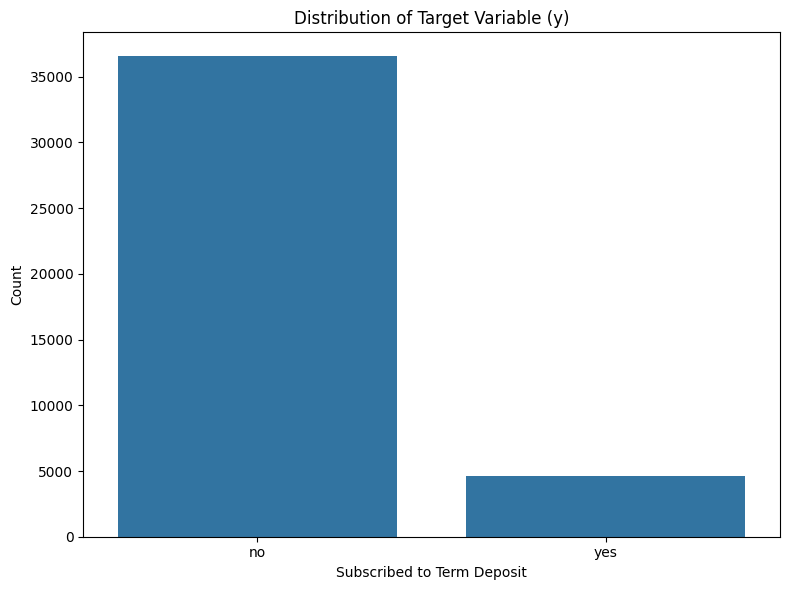

In [22]:
# Distribution of target variable
plt.figure(figsize=(8,6))
sns.countplot(x=y_16)
plt.title("Distribution of Target Variable (y)")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Boxplot of age by Target Variable

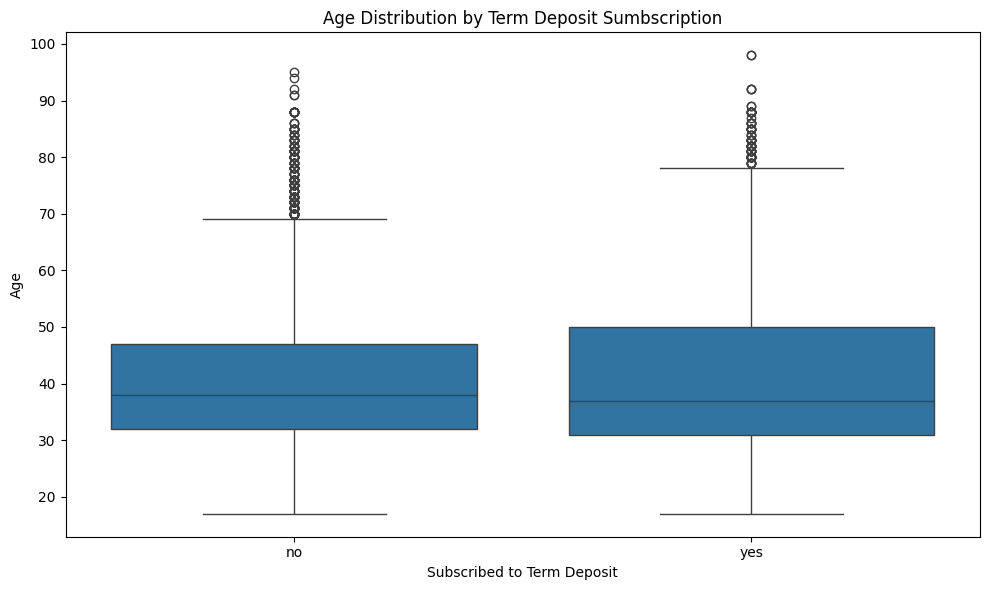

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=y_16, y=X_16['age'])
plt.title("Age Distribution by Term Deposit Sumbscription")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

 Countplot of education levels

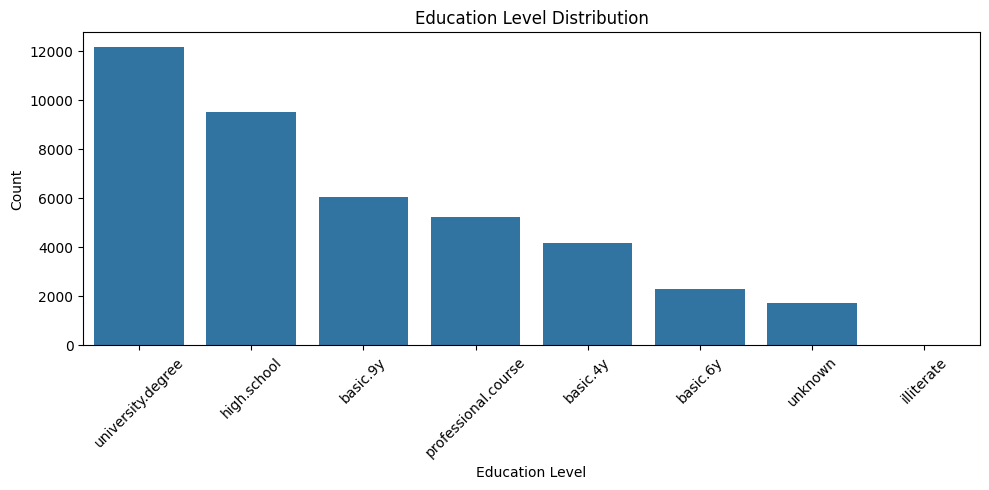

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data=X_16, x='education', order=X_16['education'].value_counts().index)
plt.title("Education Level Distribution")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Top 20 Correlation Heatmap of All Encoded Features

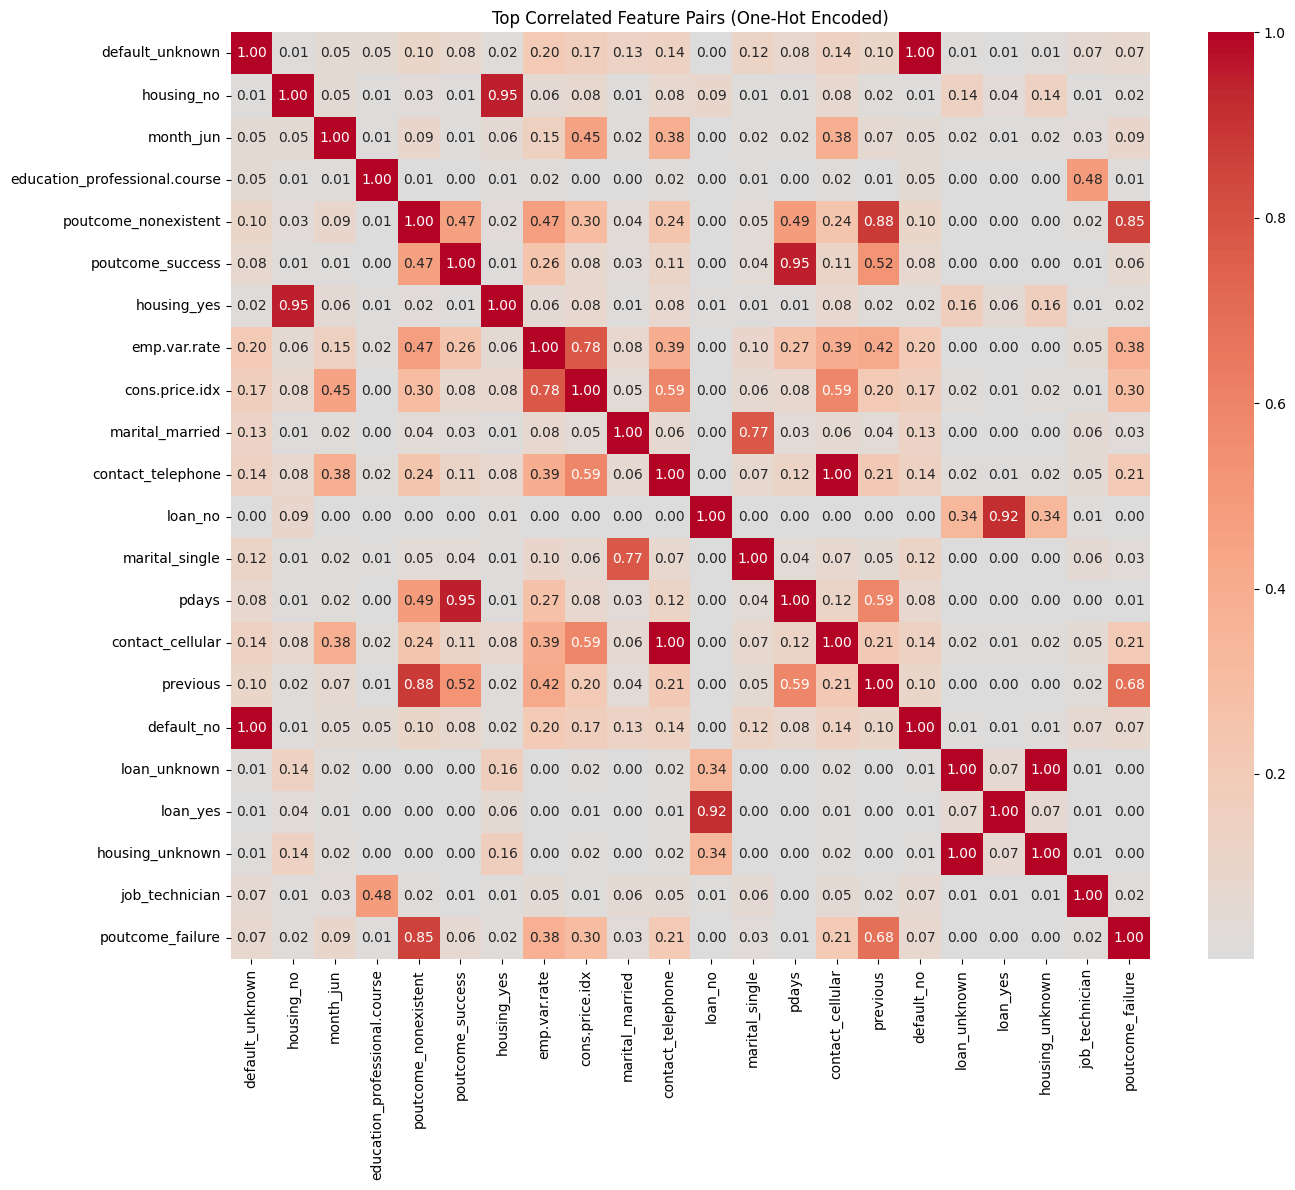

In [27]:
plt.figure(figsize=(14, 12))
corr_matrix = X_16_encoded.corr().abs()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_tri = corr_matrix.where(mask)

top_corr_pairs = (
    upper_tri.stack().sort_values(ascending=False).head(20)
)
top_features = set()
for i, j in top_corr_pairs.index:
  top_features.add(i)
  top_features.add(j)

filtered_corr = corr_matrix.loc[list(top_features), list(top_features)]
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt='.2f', center=0)
plt.title("Top Correlated Feature Pairs (One-Hot Encoded)")
plt.tight_layout()
plt.show()